In [1]:
print("ok")

ok


In [2]:
from langchain_openai import ChatOpenAI


In [3]:
from dotenv import load_dotenv

In [4]:
load_dotenv()

True

In [5]:
import os
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [6]:
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [7]:
openai_model=ChatOpenAI(model="gpt-4o")

In [8]:
openai_model.invoke("hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_d8864f8b6b', 'id': 'chatcmpl-BTLvs6oMHo68pbmd9x76zwaULWu9K', 'finish_reason': 'stop', 'logprobs': None}, id='run-5363a301-5333-4c3d-8e9d-bc3d1c04923b-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
openai_model.invoke("hi").content

'Hello! How can I assist you today?'

In [10]:
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

In [11]:
state = {}

In [12]:
state["messages"] = []

In [13]:
state

{'messages': []}

In [14]:
state["messages"].append("hi")

In [15]:
state

{'messages': ['hi']}

In [16]:
state["messages"].append("how are you?")

In [17]:
state

{'messages': ['hi', 'how are you?']}

In [18]:
state["messages"].append("what going on?")

In [19]:
# from typing_extensions import TypedDict
# from langchain_core.messages import AnyMessage
# from typing import Annotated
# from langgraph.graph.message import add_messages

In [20]:
# class MessagesState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

In [21]:
state

{'messages': ['hi', 'how are you?', 'what going on?']}

In [22]:
state["messages"][0]

'hi'

In [23]:
state["messages"][-1]

'what going on?'

In [24]:
## this state is a dict which containing the message as list and inside the list there could be n numbvers of messages

## this state will be flowing across all the nodes(function) in langgraph

In [25]:
def call_model(state:MessagesState):
    question = state["messages"]
    response = openai_model.invoke(question)
    return {"messages":[response]}

In [26]:
workflow = StateGraph(MessagesState)

In [27]:
workflow.add_node("chatbot",call_model) #chatbot is the Open AI LLM

In [28]:
workflow.add_edge(START,"chatbot")

In [29]:
workflow.add_edge("chatbot",END)

In [30]:
app = workflow.compile()

In [31]:
from IPython.display import Image,display

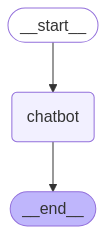

In [32]:
display(Image(app.get_graph().draw_mermaid_png()))

In [33]:
input={"messages":["hi my name is Mohan"]}

In [34]:
response = app.invoke(input)

In [35]:
response["messages"][-1].content

'Hello Mohan! How can I assist you today?'

In [36]:
input={"messages":["what can you do?"]}
response = app.invoke(input)
response["messages"][-1].content

'I can assist with a wide range of tasks including providing explanations on various topics, answering questions, offering advice on problem-solving, assisting with writing and editing, generating creative content, and more. If you have a specific task or question in mind, feel free to ask!'

In [37]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from chatbot Node
_______
{'messages': [AIMessage(content="I can help with a wide range of tasks, including:\n\n1. **Answering Questions**: I can provide information on a variety of subjects such as history, science, technology, and more.\n\n2. **Writing Assistance**: I can help with writing tasks, whether it's drafting emails, essays, or creative writing.\n\n3. **Language Help**: I can assist with language learning, grammar checks, and translations for several languages.\n\n4. **Problem Solving**: I can help break down complex problems or scenarios and offer possible solutions or explanations.\n\n5. **Recommendations**: I can suggest books, movies, and other media based on your interests.\n\n6. **General Advice**: I can offer general advice on topics like study tips, job applications, and personal development.\n\n7. **Summarization**: I can summarize articles or documents to give you the main points quickly.\n\nIf you have a specific task or question in mind, feel free to ask!"

In [38]:
@tool
def search(query:str):
    """this is a tool for weather checking"""
    if "india" in query.lower() or "delhi" in query.lower():
        return "the weather is hotty with some foggy"
    return "weather is cloudy with some darkness"

In [39]:
search.invoke("what is a weather in japan?")

'weather is cloudy with some darkness'

In [40]:
search.invoke("what is a weather in delhi?")

'the weather is hotty with some foggy'

In [41]:
tools=[search]

In [42]:
llm_with_tool=openai_model.bind_tools(tools)

In [43]:
response=llm_with_tool.invoke("hi")

In [44]:
response.content

'Hello! How can I assist you today?'

In [45]:
response.tool_calls

[]

In [46]:
result = llm_with_tool.invoke("what is a weather in europe?")

In [47]:
result.content

''

In [48]:
result.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Europe'},
  'id': 'call_sCWz2bKNjJJm7sARpl0Wt53o',
  'type': 'tool_call'}]

In [49]:
def call_model(state:MessagesState):
    question = state["messages"]
    response = llm_with_tool.invoke(question)
    return {"messages":[response]}

In [50]:
input={'messages': ['hi my name is sunny']}

In [51]:
response=call_model(input)

In [52]:
message=response["messages"]

In [53]:
last_message=message[-1]

In [54]:
last_message.content

'Hello, Sunny! How can I assist you today?'

In [55]:
last_message.tool_calls

[]

In [56]:
input={'messages': ['what is a weather in mumbai?']}

In [57]:
def router_function(state: MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [58]:
tools

[StructuredTool(name='search', description='this is a tool for weather checking', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000027E47D59DA0>)]

In [59]:
tool_node=ToolNode(tools)

In [60]:
workflow=StateGraph(MessagesState)

In [61]:
workflow.add_node("assistant",call_model)
workflow.add_node("myweathertool",tool_node)

In [62]:
workflow.add_edge(START, "assistant")

workflow.add_conditional_edges("assistant",
                               router_function,
                               {"tools": "myweathertool", END: END})

app = workflow.compile()

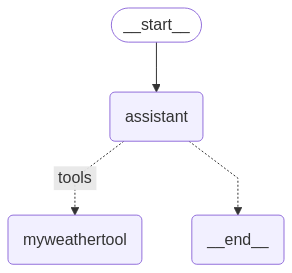

In [63]:
display(Image(app.get_graph().draw_mermaid_png()))

In [64]:
app.invoke({"messages": ["how are you?"]})

{'messages': [HumanMessage(content='how are you?', additional_kwargs={}, response_metadata={}, id='8a0d5c5b-ab4e-4f94-a923-f411e6f1b782'),
  AIMessage(content="I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 48, 'total_tokens': 78, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_90122d973c', 'id': 'chatcmpl-BTLw7M8r2LrHz7rLQgQPHWBL7Nqow', 'finish_reason': 'stop', 'logprobs': None}, id='run-3be928ff-b03f-40c1-a791-50c5fd985176-0', usage_metadata={'input_tokens': 48, 'output_tokens': 30, 'total_tokens': 78, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'aud

In [65]:
app.invoke({"messages": ["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='947abf2d-34c8-46b8-be0c-286c8ddd375c'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_kqoWEOHrnTCag69ny8EOGwhp', 'function': {'arguments': '{"query":"Delhi weather"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 52, 'total_tokens': 67, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_90122d973c', 'id': 'chatcmpl-BTLw9bBqfzc9iImB09PITmyvKHS8a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-1ddf70a3-076b-43ed-a9f3-6e4c2c0ce3a7-0', tool_calls=[{'name': 'search', 'args': {'query': 'Delhi weather'}, 'id': 'call_kqoWEOHrnTCag69ny8EOGwhp', 

In [66]:
workflow.add_edge("myweathertool","assistant")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [67]:
app = workflow.compile()

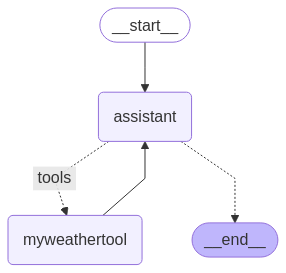

In [68]:
display(Image(app.get_graph().draw_mermaid_png()))

In [69]:
app.invoke({"messages": ["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='e43bb5d6-bbbc-498d-948e-741d535bdec9'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_DbMAmxIjHtBgOaIPf5uOeUQG', 'function': {'arguments': '{"query":"current weather in Delhi"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 52, 'total_tokens': 69, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_90122d973c', 'id': 'chatcmpl-BTLwA4vNkG6Ep1QmNY6KP406ruaqx', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-55208c10-ae75-42f7-ae31-f76380fa7aeb-0', tool_calls=[{'name': 'search', 'args': {'query': 'current weather in Delhi'}, 'id': 'call_DbMAm

In [70]:
for output in app.stream({"messages": ["what is the weather in delhi"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from assistant
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_AihWJ3N1Zsz2Eb2LqcYeG1rm', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 51, 'total_tokens': 67, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_90122d973c', 'id': 'chatcmpl-BTLwBwKHqY7UaNlwUaOT4v1yGft0i', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-1c72669c-c27a-439c-ad78-ef61a06415de-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'call_AihWJ3N1Zsz2Eb2LqcYeG1rm', 'type': 'tool_call'}], usage_metadata={'input_tokens': 51, 'output_tokens': 16, 'total_tokens': 67

In [71]:
@tool
def multiply(a:int,b:int)->int:
    """multiply a and b"""
    return a*b

In [72]:
@tool
def add(a:int,b:int)->int:
    """adding two numbers a and b"""
    return a+b

In [73]:
@tool
def divide(a:int,b:int)->int:
    """dividing two numbers a and b"""
    return a/b

In [74]:
@tool
def subtract(a:int,b:int)->int:
    """subtracting two numbers a and b """
    return a-b

In [75]:
! pip install -U duckduckgo-search -q

In [76]:
from langchain_community.tools import DuckDuckGoSearchRun


In [77]:
duckduckgo_search=DuckDuckGoSearchRun()

In [78]:
duckduckgo_search.invoke("who is a current prime minister of USA??")

"This is a list of current heads of state and heads of government. In some cases, ... Prime Minister - Keir Starmer United States: President - Donald Trump ... Prime Minister - Mahn Winn Khaing Thann: Hamas government in the Gaza Strip So said Prime Minister Mark Carney in a national television address to 41 million Canadian citizens from Parliament Hill last week. And it is almost all because of President Donald Trump's tariffs. The White House, official residence of the president of the United States. The president of the United States is the head of state and head of government of the United States, [1] indirectly elected to a four-year term via the Electoral College. [2] Under the U.S. Constitution, the officeholder leads the executive branch of the federal government and is the commander-in-chief of the United ... The absence of a prime minister in the United States is a result of deliberate choices made by the country's Founding Fathers, who designed a political system that contr

In [79]:
tools  =  [multiply, add, divide, subtract, duckduckgo_search]

In [80]:
llm_with_tools  =  openai_model.bind_tools(tools)

In [81]:
llm_with_tools

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000027E3F833A90>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000027E3E444150>, root_client=<openai.OpenAI object at 0x0000027E3E0BE1D0>, root_async_client=<openai.AsyncOpenAI object at 0x0000027E3F76A110>, model_name='gpt-4o', model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'multiply', 'description': 'multiply a and b', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'add', 'description': 'adding two numbers a and b', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'divide', 'description': 'dividing two numbers a and b', 

In [82]:
llm_with_tools.invoke("hi").tool_calls

[]

In [83]:
llm_with_tools.invoke("can you add these two number 5 and 40?").tool_calls

[{'name': 'add',
  'args': {'a': 5, 'b': 40},
  'id': 'call_PXMjR8bIws5l2xKsUpHythZY',
  'type': 'tool_call'}]

In [84]:
llm_with_tools.invoke("can you multiply these two number 5 and 40?").tool_calls

[{'name': 'multiply',
  'args': {'a': 5, 'b': 40},
  'id': 'call_XQejrGVS74PviDeiMg70YneO',
  'type': 'tool_call'}]

In [85]:
llm_with_tools.invoke("can you divide these two number 5 and 40?").tool_calls

[{'name': 'divide',
  'args': {'a': 5, 'b': 40},
  'id': 'call_6fWVGN7ZYaysOoSCuUTbQFyE',
  'type': 'tool_call'}]

In [86]:
llm_with_tools.invoke("what is a current gdp of india with current affaires").tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'current GDP of India 2023'},
  'id': 'call_gRzOVgL30IkBPRnjOcVBYyWw',
  'type': 'tool_call'}]

In [87]:
from langchain_core.messages import HumanMessage, SystemMessage

In [88]:
# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.")

In [89]:
def assistant(state:MessagesState):
    return {"messages":[llm_with_tools.invoke([sys_msg]+state["messages"])]}

In [90]:
builder = StateGraph(MessagesState)

In [91]:
builder.add_node("assistant",assistant)

In [92]:
builder.add_node("tools",ToolNode(tools))

In [93]:
builder.add_edge(START,"assistant")

In [94]:

from langgraph.prebuilt import tools_condition

In [95]:
builder.add_conditional_edges(
    "assistant",
    tools_condition #it will automatically ends, if it didn't go to tools
)

In [96]:
react_app = builder.compile()

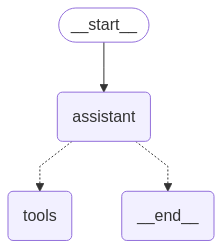

In [97]:
display(Image(react_app.get_graph().draw_mermaid_png()))

In [98]:
builder.add_edge("tools","assistant")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [99]:
react_app = builder.compile()

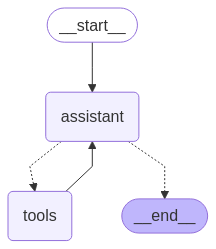

In [100]:
display(Image(react_app.get_graph().draw_mermaid_png()))

In [101]:
message = [HumanMessage(content = "what is twice of narendra modi's current age?")]

## this below detail is called a agentic flow
# first it will come to assistant
# then it will search narendra modi age
# then it will come to again assistant
# then it wil call the multiply tool for getting twice of age
# then again it will come to assistant 
# then it will generate a final answer

# REACT->> Reasoning+actions

# Thinking, action, observation, thiniking,action, observation---> if everything is going to be full fill
# then generating a final ans

In [102]:
response = react_app.invoke({"messages":message})

In [103]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is twice of narendra modi's current age?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_vcvSoRFyjxbD35MSn4b54uE7)
 Call ID: call_vcvSoRFyjxbD35MSn4b54uE7
  Args:
    query: current age of Narendra Modi
================================= Tool Message =================================
Name: duckduckgo_search

List of all Prime Ministers of India till 2025: Narendra Modi is the current and 14th Prime Minister of India who assumed office on 10 June 2024. Jawaharlal Nehru is the first and the longest ... Narendra Modi (born September 17, 1950, Vadnagar, India) is an Indian politician and government official who rose to become a senior leader of the Bharatiya Janata Party (BJP). In 2014 he led his party to victory in elections to the Lok Sabha (lower chamber of the Indian parliament), after which he was sworn in as prime minister of Ind

In [104]:
messages = [HumanMessage(content="hi hello how are you?")]

In [105]:
response = react_app.invoke({"messages":messages})

In [106]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

hi hello how are you?
================================== Ai Message ==================================

Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?


In [107]:
#########################################################################################

1. humanmessage
2. ai mesage:toolcall
3. duckcuk
4. ai assistant
5. sustract
6. ai
7. final answer

In [108]:
messages = [HumanMessage(content="what is current gdp of china and india can you give me difference between them?")]

In [109]:
response = react_app.invoke({"messages":messages})

In [110]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is current gdp of china and india can you give me difference between them?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_ATl7Oa5rD482ab2YGntTZeNG)
 Call ID: call_ATl7Oa5rD482ab2YGntTZeNG
  Args:
    query: current GDP of China 2023
  duckduckgo_search (call_xIkozyMQ2U1mZIcXpL8epWj0)
 Call ID: call_xIkozyMQ2U1mZIcXpL8epWj0
  Args:
    query: current GDP of India 2023
================================= Tool Message =================================
Name: duckduckgo_search

Graph and download economic data for Gross Domestic Product for China (MKTGDPCNA646NWDB) from 1960 to 2023 about China and GDP. Gross Domestic Product for China. Skip to main content. ... Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries ... Based on China

In [111]:
################################################################################################

As of 2023, China's GDP is approximately $17.73 trillion, while India's GDP is about $3.9 trillion. The difference in their GDPs is approximately $13.83 trillion, with China's economy being larger than India's by this amount.

In [112]:
# project:- rag,agent,deployment,modularcoding,ci/cd,git

# multiagentic collrabtive agent and supoervisor agent


Reaserch and analsysis react agent: assisgnment
1. llm assistant
2. take a realtime weather api to check the real time weather detail
3. take a realtime api for checking realtime cricket score
4. take a tool for analysis the generated data(REPL)python code
5. create a report based on the generated data
memory
human in loop
multiagentic flow


from next week onwards will implemnt the project

## 1. langgraph-> memeory saver, human in loop
## 2. multiagents

In [113]:
from dotenv import load_dotenv
load_dotenv()

import os

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

openai_model = ChatOpenAI(model="gpt-4o")
openai_model.invoke("hi")
openai_model.invoke("hi").content

'Hello! How can I assist you today?'

In [114]:

from typing import Annotated

import operator,json

from typing import TypedDict, Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph,END,START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.tools import tool

from langchain_community.tools.tavily_search import TavilySearchResults

In [115]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults

os.environ["TAVILY_API_KEY"] = os.getenv('TAVILY_API_KEY')

In [116]:
import os
# os.environ["TAVILY_API_KEY"]=TAVILY_API_KEY

In [117]:
@tool
def multiply(first_number:int, second_number:int)->int:
    """multiply two integer number"""
    return first_number * second_number

In [118]:
@tool
def search(query:str):
    """perform the web search on the user query"""
    tavily=TavilySearchResults()
    result=tavily.invoke(query)
    return result
     

In [119]:
search.invoke("who is a current PM in india?")

[{'title': 'Prime Minister of India - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/Prime_Minister_of_India',
  'content': "Rao, Atal Bihari Vajpayee, Manmohan Singh, and Narendra Modi. Modi is the current prime minister of India, serving since 26 May 2014 and the first to win three consecutive elections to secure a third successive term , 2014 , 2019 ,2024 [...] Prime Minister of India\nBhārata kē Pradhānamantrī\nLogo of the Prime Minister of India\nFlag of India\nIncumbentNarendra Modisince\xa026 May 2014\nPrime Minister's OfficeUnion Council of MinistersExecutive branch of the Indian Government\nStyle | The HonourableMr. Prime Minister(informal)His Excellency(diplomatic)\nType | Head of government\nAbbreviation | PM\nMember of | Parliament of IndiaUnion Council of Ministers\nReports to | President of IndiaVice President of IndiaParliament of India [...] Party | PMs | Years in PMO | Name(s) | Alliance\n | Indian National Congress | 6[a] | 54 years | Jawaharlal Nehru,Lal Bahadur

In [120]:
tools = [search,multiply]

In [121]:
model_with_tools = openai_model.bind_tools(tools)

In [122]:
model_with_tools.invoke("who is a cuurent pm of japan?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_rylAZc5uTmcQ6H5TcOBYjuxI', 'function': {'arguments': '{"query":"current Prime Minister of Japan 2023"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 78, 'total_tokens': 99, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_90122d973c', 'id': 'chatcmpl-BTLweix7nG0p08r6cDFfwAmHTxtpt', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-5a3f9abb-ae99-47e0-9642-eef34658b931-0', tool_calls=[{'name': 'search', 'args': {'query': 'current Prime Minister of Japan 2023'}, 'id': 'call_rylAZc5uTmcQ6H5TcOBYjuxI', 'type': 'tool_call'}], usage_metadata={'input_tokens': 78, 'output_tokens': 21, 'total_tokens': 99, 'input_tok

In [123]:
model_with_tools.invoke("who is a cuurent pm of japan?").tool_calls

[{'name': 'search',
  'args': {'query': 'current Prime Minister of Japan 2023'},
  'id': 'call_U44ETEAF0vp7UkLwYBUjWXVV',
  'type': 'tool_call'}]

In [124]:
tool_mapping = {tool.name: tool for tool in tools}

In [125]:
tool_mapping

{'search': StructuredTool(name='search', description='perform the web search on the user query', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000027E5E11E7A0>),
 'multiply': StructuredTool(name='multiply', description='multiply two integer number', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000027E47D5A020>)}

In [126]:
response = model_with_tools.invoke("who is a current president of uk?")

In [127]:
response

AIMessage(content='The United Kingdom does not have a president. Instead, it has a constitutional monarchy and a parliamentary democracy. As of the latest information, the head of state is King Charles III, and the head of government is the Prime Minister. Rishi Sunak is the current Prime Minister of the United Kingdom.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 77, 'total_tokens': 139, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_90122d973c', 'id': 'chatcmpl-BTLwgt8wWPOLSFNrWYQnjqKsozAxl', 'finish_reason': 'stop', 'logprobs': None}, id='run-b9df1135-9851-4a06-a3df-f25234e55fc8-0', usage_metadata={'input_tokens': 77, 'output_tokens': 62, 'total_tokens': 139, 'input_token_details': {'audio': 0, 'c

In [128]:
tool_details = response.additional_kwargs

In [129]:
tool_details

{'refusal': None}

In [130]:
tool_details = tool_details.get("tool_calls")

In [131]:
# tool_details[0]["function"]["name"]

In [132]:
tool_details[0]["function"]["arguments"]

TypeError: 'NoneType' object is not subscriptable

In [ ]:
json.loads(tool_details[0]["function"]["arguments"])

{'query': 'current Prime Minister of UK 2023'}

In [ ]:
tool_mapping[tool_details[0]["function"]["name"]].invoke(json.loads(tool_details[0]["function"]["arguments"]))

[{'title': 'Rishi Sunak - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/Rishi_Sunak',
  'content': "Sunak selected his cabinet ministers after his appointment as prime minister. Jeremy Hunt was appointed Chancellor of the Exchequer, and Dominic Raab was also re-appointed as deputy prime minister and Justice Secretary, he later resigned from these roles in April 2023 and was replaced by Oliver Dowden. James Cleverly was appointed Foreign Secretary with Suella Braverman as Home Secretary. Ben Wallace was appointed Secretary of State for Defence. Michael Gove was appointed Levelling Up [...] PoliciesPolitical positionsLeader of the Conservative PartyLeader of the OppositionMP for Richmond and NorthallertonChancellor of the ExchequerChancellorshipCOVID-19 pandemicgovernment responseFurlough SchemeEat Out to Help OutPartygateLockdown FilesInquiryCost-of-living crisisIndustrial disputespostal workersstrikesrailway strikesNHS strikesJuly 2022 government crisisBudgets2020March 2021Octobe

In [ ]:
tool_mapping={tool.name: tool for tool in tools}

In [ ]:
tool_mapping

{'search': StructuredTool(name='search', description='perform the web search on the user query', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001577F2D5940>),
 'multiply': StructuredTool(name='multiply', description='multiply two integer number', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000001577F2D58A0>)}

In [ ]:
######################### ---------------------------- ###############################################

In [ ]:

class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage], operator.add]

In [ ]:
def invoke_model(state:AgentState):
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question
    return {"messages":[model_with_tools.invoke(question)]}

In [ ]:
def invoke_tool(state:AgentState):
    print("****my state*****")

    print(state['messages'][-1])
    
    tool_details= state['messages'][-1].additional_kwargs.get("tool_calls", [])[0]
    
    if tool_details is None:
        raise Exception("no tool call found")
    
    print(f'Selected tool: {tool_details.get("function").get("name")}')
    
    if tool_details.get("function").get("name")=="search":
        print("**********tool detils****")
        print(tool_details)
        response = input(prompt=f"[y/n] continue with expensive web search?")
        if response == "n":
            raise Exception("web search discard")
        
    response = tool_mapping[tool_details['function']['name']].invoke(json.loads(tool_details.get("function").get("arguments")))
    
    return {"messages" : [response]}

     

In [ ]:
def router(state:AgentState):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    if len(tool_calls):
        return "tool"
    else:
        return "end"
     

In [ ]:
graph = StateGraph(AgentState)

In [ ]:
graph.add_node("ai_assistant",invoke_model)
graph.add_node("tool",invoke_tool)

In [ ]:
graph.add_conditional_edges("ai_assistant",
                            router,
                            {"tool":"tool",
                             "end":END})

In [ ]:
graph.add_edge("tool", END)

graph.add_edge("tool", "ai_assistant")

graph.set_entry_point("ai_assistant")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [ ]:
app = graph.compile()

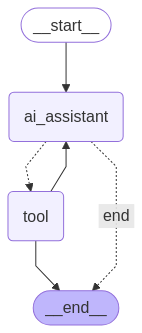

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
app.invoke({"messages": ["who is upcoming president of USA?"]})

****my state*****
content='' additional_kwargs={'tool_calls': [{'id': 'call_3uDlZebfpidUgX8q9d3q7ayj', 'function': {'arguments': '{"query":"upcoming president of USA 2023"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 76, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_90122d973c', 'id': 'chatcmpl-BT1fe9p4bOTJSlzHYLQ2RETPb7HY6', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-2773e2a6-b337-4adf-a6ba-42dd856012f1-0' tool_calls=[{'name': 'search', 'args': {'query': 'upcoming president of USA 2023'}, 'id': 'call_3uDlZebfpidUgX8q9d3q7ayj', 'type': 'tool_call'}] usage_metadata={'input_tokens': 76, 'output_tokens': 21, 'total_tokens': 97, 'input_token_detail

TypeError: 'dict' object is not callable

In [ ]:
for s in app.stream({"messages": ["who is upcoming president of USA?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wbEnE8UR9OcJzhuj9ekb3WjE', 'function': {'arguments': '{"query":"upcoming president of USA 2023"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 76, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_22890b9c0a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3f9b73d6-f8cf-4ce0-b2e7-a0565f76b1ea-0', tool_calls=[{'name': 'search', 'args': {'query': 'upcoming president of USA 2023'}, 'id': 'call_wbEnE8UR9OcJzhuj9ekb3WjE', 'type': 'tool_call'}], usage_metadata={'input_tokens': 76, 'output_tokens': 21, 'total_tokens': 97, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'o

In [ ]:
app.invoke({"messages": ["what is multiplication of 23 and 46?"]})

****my state*****
content='' additional_kwargs={'tool_calls': [{'id': 'call_ALEOtWG6aSCvfIeKsRQhblGS', 'function': {'arguments': '{"first_number":23,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 79, 'total_tokens': 99, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_d8864f8b6b', 'id': 'chatcmpl-BT0MH900jer6aS8cxM3Q414B9HqFX', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-2e220ae6-f5b5-431c-af84-33011697a3d8-0' tool_calls=[{'name': 'multiply', 'args': {'first_number': 23, 'second_number': 46}, 'id': 'call_ALEOtWG6aSCvfIeKsRQhblGS', 'type': 'tool_call'}] usage_metadata={'input_tokens': 79, 'output_tokens': 20, 'total_tokens': 99, 'input_token_details'

{'messages': ['what is multiplication of 23 and 46?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ALEOtWG6aSCvfIeKsRQhblGS', 'function': {'arguments': '{"first_number":23,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 79, 'total_tokens': 99, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_d8864f8b6b', 'id': 'chatcmpl-BT0MH900jer6aS8cxM3Q414B9HqFX', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-2e220ae6-f5b5-431c-af84-33011697a3d8-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 23, 'second_number': 46}, 'id': 'call_ALEOtWG6aSCvfIeKsRQhblGS', 'type': 'tool_call'}], usage_metadata={'input_tokens': 79, 'output_t

In [ ]:
app.invoke({"messages": ["what is today's match score?"]})

{'messages': ["what is today's match score?",
  AIMessage(content='Could you please specify which sport or match you are referring to, such as a particular football, cricket, or tennis match? This will help me provide more accurate information.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 75, 'total_tokens': 111, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_90122d973c', 'id': 'chatcmpl-BT0MJ6mbhJ4WpH2BAQBMr7IsuwVwN', 'finish_reason': 'stop', 'logprobs': None}, id='run-b6271a09-3615-4799-9af3-6a2bab1ac636-0', usage_metadata={'input_tokens': 75, 'output_tokens': 36, 'total_tokens': 111, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

## Langgraph human in loop concept

In [ ]:

tavily = TavilySearchResults()
     

In [ ]:

tools = [tavily]

In [ ]:
llm_with_tools = openai_model.bind_tools(tools)

In [ ]:
def ai_assistant(state: AgentState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [ ]:
memory = MemorySaver()

In [ ]:
graph_builder = StateGraph(AgentState)
graph_builder.add_node("ai_assistant", ai_assistant)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [ ]:
graph_builder.add_edge(START, "ai_assistant")

graph_builder.add_conditional_edges(
    "ai_assistant",
    tools_condition,
)
graph_builder.add_edge("tools", "ai_assistant")

In [ ]:
app2=graph_builder.compile(
    checkpointer  = memory,
    interrupt_before = ["tools"]
)

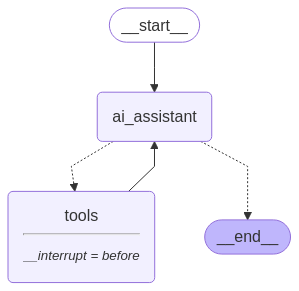

In [ ]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [ ]:
user_input = "what is current a capital of india?"
config = {"configurable": {"thread_id": "1"}}

In [ ]:
user_input = "what is today value of apple stock?"
config = {"configurable": {"thread_id": "1"}}

In [ ]:
user_input = "famous places of the bangalore and must visit restaurants?"
config = {"configurable": {"thread_id": "1"}}

In [ ]:
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [ ]:
for event in events:
    print(event)

{'messages': [('user', 'famous places of the bangalore and must visit restaurants?')]}
{'messages': [('user', 'famous places of the bangalore and must visit restaurants?'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_AUq6bnxSScX4Rbvh5rhTTgIU', 'function': {'arguments': '{"query": "famous places to visit in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}, {'id': 'call_W0Bj1assm8CJus47TOLqjp3s', 'function': {'arguments': '{"query": "must visit restaurants in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 91, 'total_tokens': 154, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f5bdcc3276', 'id': 'chatcmp

In [ ]:
snapshot = app2.get_state(config)

In [ ]:
snapshot.next

('tools',)

In [ ]:

last_message = snapshot.values["messages"][-1]

In [ ]:

last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'famous places to visit in Bangalore'},
  'id': 'call_AUq6bnxSScX4Rbvh5rhTTgIU',
  'type': 'tool_call'},
 {'name': 'tavily_search_results_json',
  'args': {'query': 'must visit restaurants in Bangalore'},
  'id': 'call_W0Bj1assm8CJus47TOLqjp3s',
  'type': 'tool_call'}]

In [ ]:
events = app2.stream(None, config, stream_mode="values")

In [ ]:

for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_AUq6bnxSScX4Rbvh5rhTTgIU)
 Call ID: call_AUq6bnxSScX4Rbvh5rhTTgIU
  Args:
    query: famous places to visit in Bangalore
  tavily_search_results_json (call_W0Bj1assm8CJus47TOLqjp3s)
 Call ID: call_W0Bj1assm8CJus47TOLqjp3s
  Args:
    query: must visit restaurants in Bangalore
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Best Restaurants In Bangalore To Delight Your Taste Buds In 2025!", "url": "https://traveltriangle.com/blog/best-restaurants-in-bangalore/", "content": "The king of cafes in Bangalore, Toit has set an unmatched standard amongst all the best restaurants in Bangalore. Freshly brewed beer, lively music, and a wide variety of international main courses and starters combine to give this place a ‘must-visit’ tag for any first-timer. It is one of the best restaurants in 

In [ ]:

user_input = "what is a weather there?"

config = {"configurable": {"thread_id": "1"}}

In [ ]:
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [ ]:
for event in events:
    print(event)

{'messages': [['user', 'famous places of the bangalore and must visit restaurants?'], AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_AUq6bnxSScX4Rbvh5rhTTgIU', 'function': {'arguments': '{"query": "famous places to visit in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}, {'id': 'call_W0Bj1assm8CJus47TOLqjp3s', 'function': {'arguments': '{"query": "must visit restaurants in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 91, 'total_tokens': 154, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f5bdcc3276', 'id': 'chatcmpl-BT1qbpjEEfjhjDIXUGjeFmW9Rm8kB', 'finish_reason': 'tool_calls', 'logprobs': None}, id=

In [ ]:

for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

In [ ]:

snapshot = app2.get_state(config)
     

In [ ]:

snapshot.next

('tools',)

In [ ]:

last_message = snapshot.values["messages"][-1]

In [ ]:

last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'current weather in Bangalore'},
  'id': 'call_U1DDKf5aP2ZgwEkm3Fibn72s',
  'type': 'tool_call'}]

In [ ]:
events = app2.stream(None, config, stream_mode="values")

In [ ]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_U1DDKf5aP2ZgwEkm3Fibn72s)
 Call ID: call_U1DDKf5aP2ZgwEkm3Fibn72s
  Args:
    query: current weather in Bangalore
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Weather in Bangalore", "url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Bangalore', 'region': 'Karnataka', 'country': 'India', 'lat': 12.9833, 'lon': 77.5833, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1746259031, 'localtime': '2025-05-03 13:27'}, 'current': {'last_updated_epoch': 1746258300, 'last_updated': '2025-05-03 13:15', 'temp_c': 31.0, 'temp_f': 87.8, 'is_day': 1, 'condition': {'text': 'Partly Cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 5.6, 'wind_kph': 9.0, 'wind_degree': 214, 'wind_dir': 'SW', 'pressure_mb': 1014.0, 'pressure_in': 29.94, 'p

In [ ]:

app2.get_state(config)

StateSnapshot(values={'messages': [['user', 'famous places of the bangalore and must visit restaurants?'], AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_AUq6bnxSScX4Rbvh5rhTTgIU', 'function': {'arguments': '{"query": "famous places to visit in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}, {'id': 'call_W0Bj1assm8CJus47TOLqjp3s', 'function': {'arguments': '{"query": "must visit restaurants in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 91, 'total_tokens': 154, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f5bdcc3276', 'id': 'chatcmpl-BT1qbpjEEfjhjDIXUGjeFmW9Rm8kB', 'finish_reason': 'tool_calls', '

In [ ]:
snapshot = app2.get_state(config)

In [ ]:

snapshot.next

()

In [ ]:

user_input = "give me the recent news from there?"

config = {"configurable": {"thread_id": "1"}}

In [ ]:
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [ ]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

AttributeError: 'tuple' object has no attribute 'pretty_print'

In [ ]:

snapshot = app2.get_state(config)
     

In [ ]:

current_message = snapshot.values["messages"]
     

In [ ]:
current_message

[['user', 'famous places of the bangalore and must visit restaurants?'],
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_AUq6bnxSScX4Rbvh5rhTTgIU', 'function': {'arguments': '{"query": "famous places to visit in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}, {'id': 'call_W0Bj1assm8CJus47TOLqjp3s', 'function': {'arguments': '{"query": "must visit restaurants in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 91, 'total_tokens': 154, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f5bdcc3276', 'id': 'chatcmpl-BT1qbpjEEfjhjDIXUGjeFmW9Rm8kB', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6dd2c77

In [ ]:
for event in events:
    if "messages" in event:
        last_message = event["messages"][-1]
        # Print the tuple elements (e.g., role and content)


In [ ]:
current_message.pretty_print()

AttributeError: 'list' object has no attribute 'pretty_print'

In [ ]:

tool_call_id = current_message.tool_calls[0]["id"] 

AttributeError: 'list' object has no attribute 'tool_calls'

In [ ]:

from langchain_core.messages import AIMessage, ToolMessage

In [ ]:
answer="delhi is too hot now a days as well as bit foggy"

In [ ]:

new_messages = [
    ToolMessage(content=answer, tool_call_id=tool_call_id),
    AIMessage(content=answer),
]

NameError: name 'tool_call_id' is not defined

In [ ]:

app2.update_state(
    config,
    {"messages": new_messages},
)

NameError: name 'new_messages' is not defined

In [ ]:

print(app2.get_state(config).values["messages"][-1:])

[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_EIkRMcFxz1LSqajGWH0DJJlQ', 'function': {'arguments': '{"query":"Bangalore recent news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 4741, 'total_tokens': 4763, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 4608}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f5bdcc3276', 'id': 'chatcmpl-BT22t3Q7MZaVH8NsbNPgW3KwYkh7r', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-7022298d-076e-42e9-9bb3-e4784565260e-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'Bangalore recent news'}, 'id': 'call_EIkRMcFxz1LSqajGWH0DJJlQ', 'type': 'tool_call'}], usage_metadata={'input_tokens': 4741, 'output_tokens': 22, 'total_tok